# Tests for Models: XGBoost and LightGDM

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import xgboost as xgb

## Function to Plot Feature Importance

In [2]:
def plot_feature_importance(model, feature_names, model_name):
    importance = model.feature_importances_
    sorted_idx = importance.argsort()

    print

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], palette="viridis")
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()

    

## Load Data

In [3]:
df = pd.read_csv('/home/hardikprakash/Projects/powerq/data/raw/powerconsumption.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])

features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
target = 'PowerConsumption_Zone1'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialise, Train Models

In [4]:
# Initialize LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 41932, number of used features: 6
[LightGBM] [Info] Start training from score 32332.038211


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Predict

In [5]:
lgb_preds = lgb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

## Evaluate

In [6]:
# Evaluate LightGBM
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_preds))
lgb_r2 = r2_score(y_test, lgb_preds)

# Evaluate XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

# Print results
print("LightGBM Results:")
print(f"RMSE: {lgb_rmse:.2f}")
print(f"R² Score: {lgb_r2:.2f}")

print("\nXGBoost Results:")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R² Score: {xgb_r2:.2f}")

LightGBM Results:
RMSE: 1462.67
R² Score: 0.96

XGBoost Results:
RMSE: 1292.76
R² Score: 0.97


## Evaluate Feature Importance

/tmp/ipykernel_15562/3957051748.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], palette="viridis")


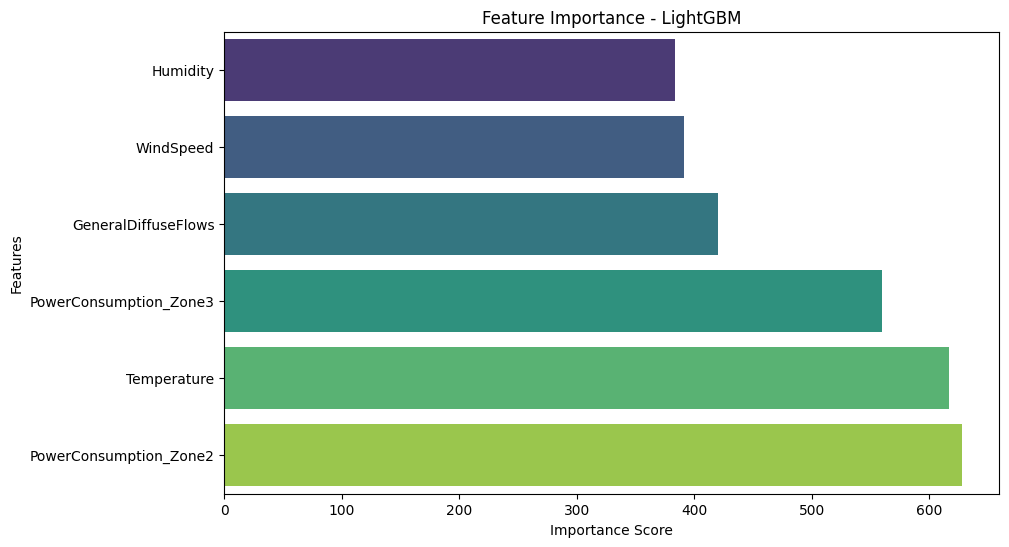

/tmp/ipykernel_15562/3957051748.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], palette="viridis")


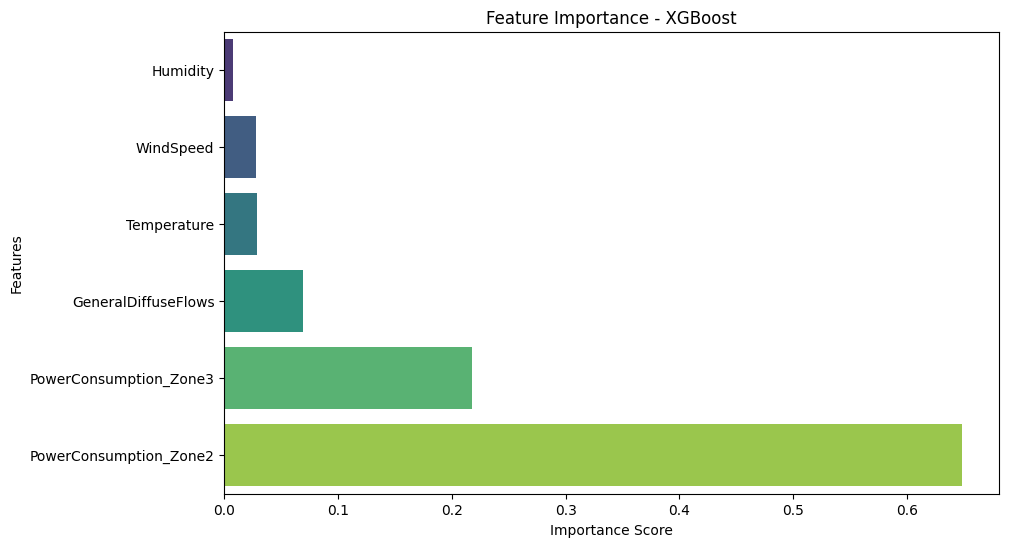

LightGBM Feature Importance:
PowerConsumption_Zone2: 628
Temperature: 617
PowerConsumption_Zone3: 560
GeneralDiffuseFlows: 420
WindSpeed: 391
Humidity: 384

XGBoost Feature Importance:
PowerConsumption_Zone2: 0.6484870314598083
PowerConsumption_Zone3: 0.2176234871149063
GeneralDiffuseFlows: 0.06924179941415787
Temperature: 0.029145125299692154
WindSpeed: 0.027957862243056297
Humidity: 0.007544695865362883


In [7]:
plot_feature_importance(lgb_model, X.columns, "LightGBM")

plot_feature_importance(xgb_model, X.columns, "XGBoost")

# LightGBM Feature Importance
lgb_importance = lgb_model.feature_importances_
lgb_features = X.columns
lgb_feature_importance = sorted(zip(lgb_features, lgb_importance), key=lambda x: x[1], reverse=True)

print("LightGBM Feature Importance:")
for feature, importance in lgb_feature_importance:
    print(f"{feature}: {importance}")

# XGBoost Feature Importance
xgb_importance = xgb_model.feature_importances_
xgb_features = X.columns
xgb_feature_importance = sorted(zip(xgb_features, xgb_importance), key=lambda x: x[1], reverse=True)

print("\nXGBoost Feature Importance:")
for feature, importance in xgb_feature_importance:
    print(f"{feature}: {importance}")


## LightGBM Hyperparameter Tuning

In [8]:

# # Define the parameter grid for LightGBM
# param_grid_lgbm = {
#     'n_estimators': [100, 300],
#     'learning_rate': [0.05, 0.1],
#     'num_leaves': [31, 50, 70],
#     'max_depth': [10, 15],
#     'min_data_in_leaf': [10, 20],
#     'lambda_l2': [0.0, 0.1, 0.5]  # Adding some regularization
# }
# # Initialize LightGBM model
# lgbm = lgb.LGBMRegressor()

# # Perform GridSearchCV
# grid_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=3, scoring='r2', verbose=2, n_jobs=-1)
# grid_lgbm.fit(X_train, y_train)

# # Best parameters and score
# print("Best Parameters for LightGBM:", grid_lgbm.best_params_)
# print("Best R² Score for LightGBM:", grid_lgbm.best_score_)


## XGBoost Hyperparameter Tuning

In [9]:

# # Define the parameter grid for XGBoost
# param_grid_xgb = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 10],
#     'colsample_bytree': [0.7, 0.9, 1],
# }

# # Initialize XGBoost model
# xgb = xgb.XGBRegressor()

# # Perform GridSearchCV
# grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='r2', verbose=2, n_jobs=-1)
# grid_xgb.fit(X_train, y_train)

# # Best parameters and score
# print("Best Parameters for XGBoost:", grid_xgb.best_params_)
# print("Best R² Score for XGBoost:", grid_xgb.best_score_)


## Feature Selection Based on Importance

### XGBoost

In [12]:
# Drop 'Humidity' due to low importance
X_train_reduced = X_train.drop(['Humidity'], axis=1)
X_test_reduced = X_test.drop(['Humidity'], axis=1)

# Initialize XGBoost with default parameters
xgb_default = xgb.XGBRegressor()
xgb_default.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred_xgb = xgb_default.predict(X_test_reduced)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost with Default Parameters - RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")


XGBoost with Default Parameters - RMSE: 1384.10, R²: 0.96


### LightGBM

In [13]:
lgbm_default = lgb.LGBMRegressor()
lgbm_default.fit(X_train, y_train)

# Predict and evaluate
y_pred_lgbm = lgbm_default.predict(X_test)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM with Default Parameters - RMSE: {rmse_lgbm:.2f}, R²: {r2_lgbm:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 41932, number of used features: 6
[LightGBM] [Info] Start training from score 32332.038211
LightGBM with Default Parameters - RMSE: 1462.67, R²: 0.96


## Tuning XGBoost for PowerZone2 and 3

In [21]:
y_train_zone2 = y_train  # Since it's a Series, you don't need .columns
y_train_zone3 = y_train

# Function for hyperparameter tuning using GridSearchCV
def tune_xgboost(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0]
    }

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                               cv=3, scoring='neg_root_mean_squared_error', verbose=2)
    
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Tune for Zone 2
print("Tuning XGBoost for PowerConsumption_Zone2...")
best_xgb_zone2, best_params_zone2 = tune_xgboost(X_train, y_train_zone2)
print("Best Params for Zone 2:", best_params_zone2)

# Tune for Zone 3 (if needed)
print("Tuning XGBoost for PowerConsumption_Zone3...")
best_xgb_zone3, best_params_zone3 = tune_xgboost(X_train, y_train_zone3)
print("Best Params for Zone 3:", best_params_zone3)


Tuning XGBoost for PowerConsumption_Zone2...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_est